In [1]:
!pip install --upgrade pip

In [2]:
!pip3 install imblearn

In [3]:
# Regular exploratory data analysis and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from sklearn import preprocessing


# import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve

# Over Sampler
from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [4]:
# read data
data = pd.read_csv('Breast_Cancer.csv')

## Exploratory Data Analysis

## Features
* Age: Age of the patient at the time of diagnosis.
* Race: The racial background of the patient.
* Marital Status: Whether the patient is married, single, divorced, etc.
* T Stage: The stage of the tumor, as determined by the TNM staging system.
* N Stage: The stage of the neighboring lymph nodes, as determined by the TNM staging system.
* 6th Stage: The 6th stage of the TNM staging system, which is determined by the size of the tumor and the presence of metastasis.
* Differentiate: The degree to which the tumor cells look like normal cells.
* Grade: The grade of the tumor, which is determined by the appearance of the tumor cells under the microscope.
* A Stage: The stage of the adjacent tissues, as determined by the TNM staging system.
* Tumor Size: The size of the tumor, as determined by imaging or physical examination.
* Estrogen Status: The presence or absence of estrogen receptors in the tumor cells.
* Progesterone Status: The presence or absence of progesterone receptors in the tumor cells.
* Regional Node Examined: The number of regional lymph nodes that were examined for the presence of cancer cells.
* Regional Node Positive: The number of regional lymph nodes that were found to contain cancer cells.
* Survival Months: The length of time (in months) between the patient's diagnosis and their death.
* Status: Whether the patient is alive or deceased.

In [5]:
# display top 5 rows
data.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

In [6]:
# last five columns
data.tail()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive

In [7]:
# Renaming some column names
data.rename({'Tumor Size' : 'Tumor Size (mm)', 'T Stage ': 'T Stage', 'Reginol Node Positive' : 'Regional Node Positive',
             'differentiate' : 'Differentiate'}, axis=1, inplace=True)

In [8]:
# checking the shape of the dataframe
data.shape

(4024, 16)

In [9]:
# display information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size (mm)         4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Regional Node Positive  4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [10]:
# checking sum of duplicated rows
data.duplicated().sum()

1

In [11]:
# keep first duplicate row
data = data.drop_duplicates()

In [12]:
# check for null values
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiate             0
Grade                     0
A Stage                   0
Tumor Size (mm)           0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
Status                    0
dtype: int64

In [13]:
# display more information about the data
data.describe()

Age  Tumor Size (mm)  Regional Node Examined  \
count  4023.000000      4023.000000             4023.000000   
mean     53.969923        30.477007               14.358439   
std       8.963118        21.121253                8.100241   
min      30.000000         1.000000                1.000000   
25%      47.000000        16.000000                9.000000   
50%      54.000000        25.000000               14.000000   
75%      61.000000        38.000000               19.000000   
max      69.000000       140.000000               61.000000   

       Regional Node Positive  Survival Months  
count             4023.000000      4023.000000  
mean                 4.158837        71.301765  
std                  5.109724        22.923009  
min                  1.000000         1.000000  
25%                  1.000000        56.000000  
50%                  2.000000        73.000000  
75%                  5.000000        90.000000  
max                 46.000000       107.000000

In [14]:
# finding out how many of each class there are
data['Status'].value_counts()

Alive    3407
Dead      616
Name: Status, dtype: int64

In [15]:
# visualizing the class
data['Status'].value_counts().plot(kind='bar', color=['green','salmon'])
plt.title('Status plot')
plt.xticks(rotation=0);

                         We have an imbalance data

In [16]:
# printing categorical columns name
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
print(f"Categorical Columns {len(cat_cols)}")
cat_cols

Categorical Columns 11


['Race',
 'Marital Status',
 'T Stage',
 'N Stage',
 '6th Stage',
 'Differentiate',
 'Grade',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status',
 'Status']

In [17]:
#printing numerical columns name
num_cols = [col for col in data.columns if data[col].dtype == 'int64']
print(f"Numerical Columns {len(num_cols)}")
num_cols

Numerical Columns 5


['Age',
 'Tumor Size (mm)',
 'Regional Node Examined',
 'Regional Node Positive',
 'Survival Months']

In [18]:
# plotting countplot of categoical features
fig, axes = plt.subplots(nrows=int(np.ceil(len(cat_cols)/2)), ncols=2, figsize = (16,24))
for i, col in enumerate(cat_cols):
    ax = axes[i//2, i%2]
    fig.suptitle('Categorical Features', fontsize=25, va='top')
    ax.set_title(f'Plot of {col.title()} categories', fontdict={'fontsize': 20})
    ax.set_xlabel('x label', fontdict={'fontsize': 18})
    ax.set_ylabel('Number of records', fontdict={'fontsize': 18})
    ax.tick_params(axis='x', labelsize=15)
    sns.countplot(x=col, data=data, ax=ax)

plt.tight_layout()
plt.show()

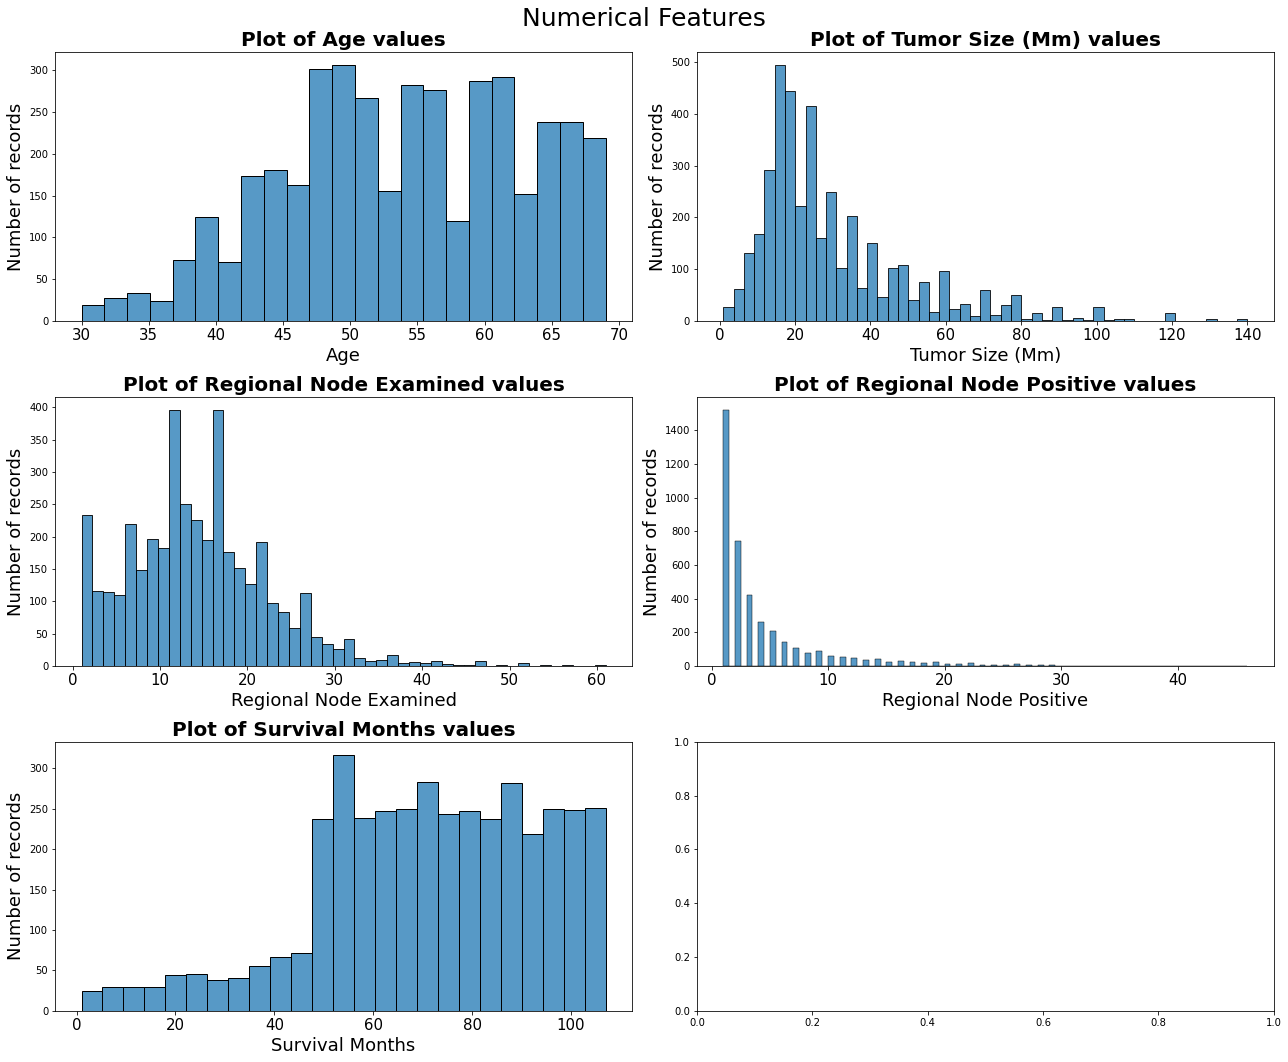

In [19]:
# plotting countplot of categoical features
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_cols)/2)), ncols=2, figsize = (18,15))
for i, col in enumerate(num_cols):
    ax = axes[i//2, i%2]
    fig.suptitle('Numerical Features', fontsize=25, va='top')
    ax.set_title(f'Plot of {col.title()} values', fontdict={'fontsize': 20},fontweight ='bold')
    ax.set_xlabel(col.title(), fontdict={'fontsize': 18})
    ax.set_ylabel('Number of records', fontdict={'fontsize': 18})
    ax.tick_params(axis='x', labelsize=15)
    sns.histplot(x=col, data=data, ax=ax)

plt.tight_layout()
plt.show()

`Tumor Size (mm)`, `Regional Node Examined`, `Regional Node Positive` are skewed to the left while `Age` and `Survival Months` are skewed to the right

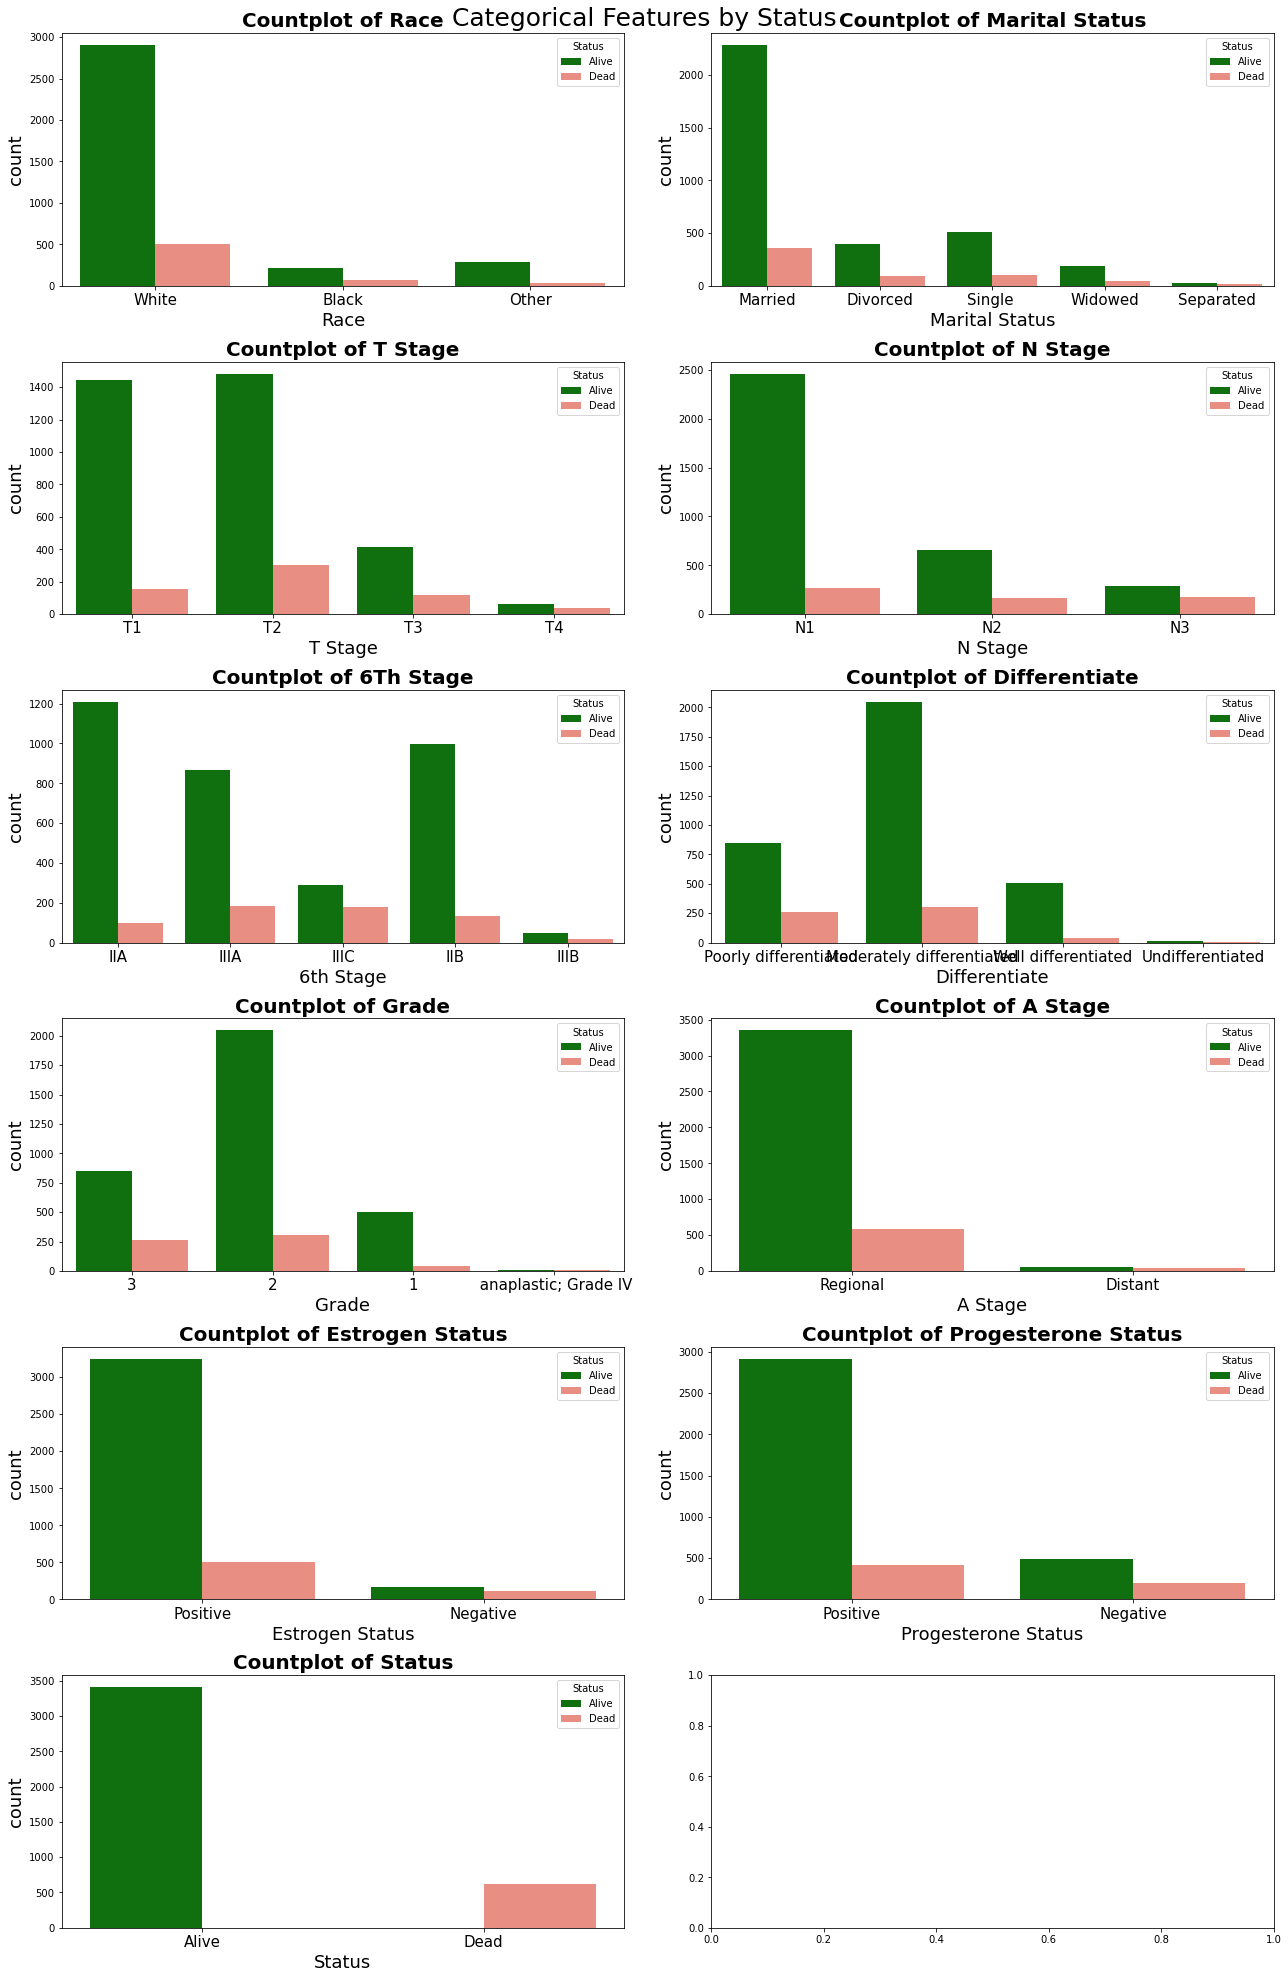

In [20]:
# distribution of categorical variables by status
fig, axes = plt.subplots(nrows=int(np.ceil(len(cat_cols)/2)), ncols=2, figsize = (18,28))
for i, col in enumerate(cat_cols):
    ax = axes[i//2, i%2]
    fig.suptitle('Categorical Features by Status', fontsize=25, va='top')
    ax.set_title(f'Countplot of {col.title()}', fontdict={'fontsize': 20},fontweight ='bold')
    ax.set_xlabel('x label', fontdict={'fontsize': 18})
    ax.set_ylabel('Number of records', fontdict={'fontsize': 18})
    ax.tick_params(axis='x', labelsize=15)
    sns.countplot(x=col, data=data, ax=ax, hue=data['Status'],palette=['green', 'salmon'])

plt.tight_layout()
plt.show()

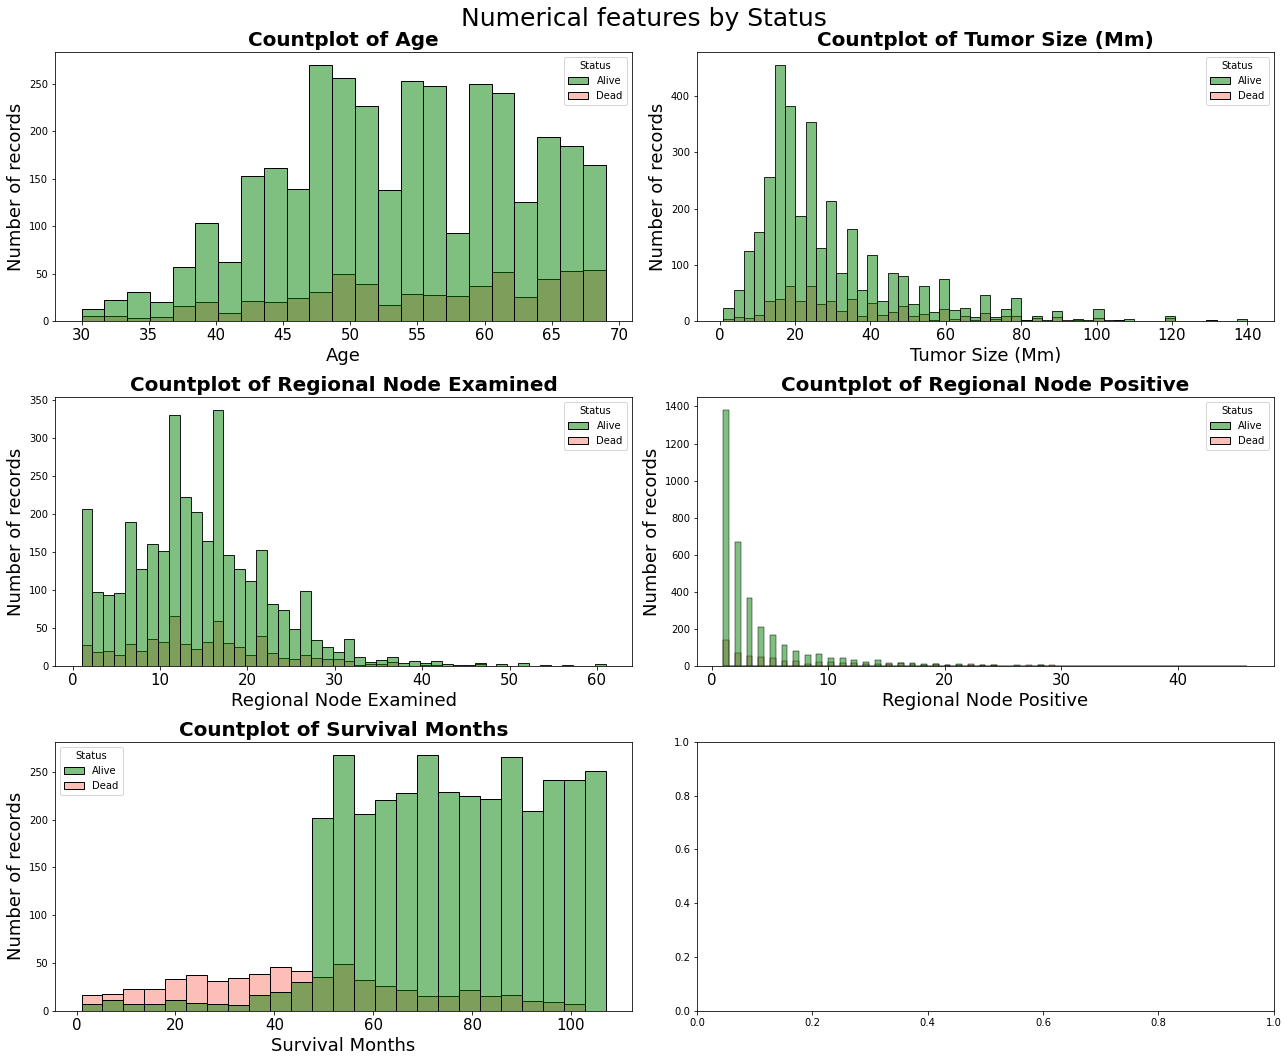

In [21]:
# distribution of numerical variables by status
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_cols)/2)), ncols=2, figsize = (18,15))
for i, col in enumerate(num_cols):
    ax = axes[i//2, i%2]
    fig.suptitle('Numerical features by Status', fontsize=25, va='top')
    ax.set_title(f'Countplot of {col.title()}', fontdict={'fontsize': 20},fontweight ='bold')
    ax.set_xlabel(col.title(), fontdict={'fontsize': 18})
    ax.set_ylabel('Number of records', fontdict={'fontsize': 18})
    ax.tick_params(axis='x', labelsize=15)
    sns.histplot(x=col, data=data, ax=ax, hue=data['Status'], palette=['green', 'salmon'])

plt.tight_layout()
plt.show()

## Dealing with outliers

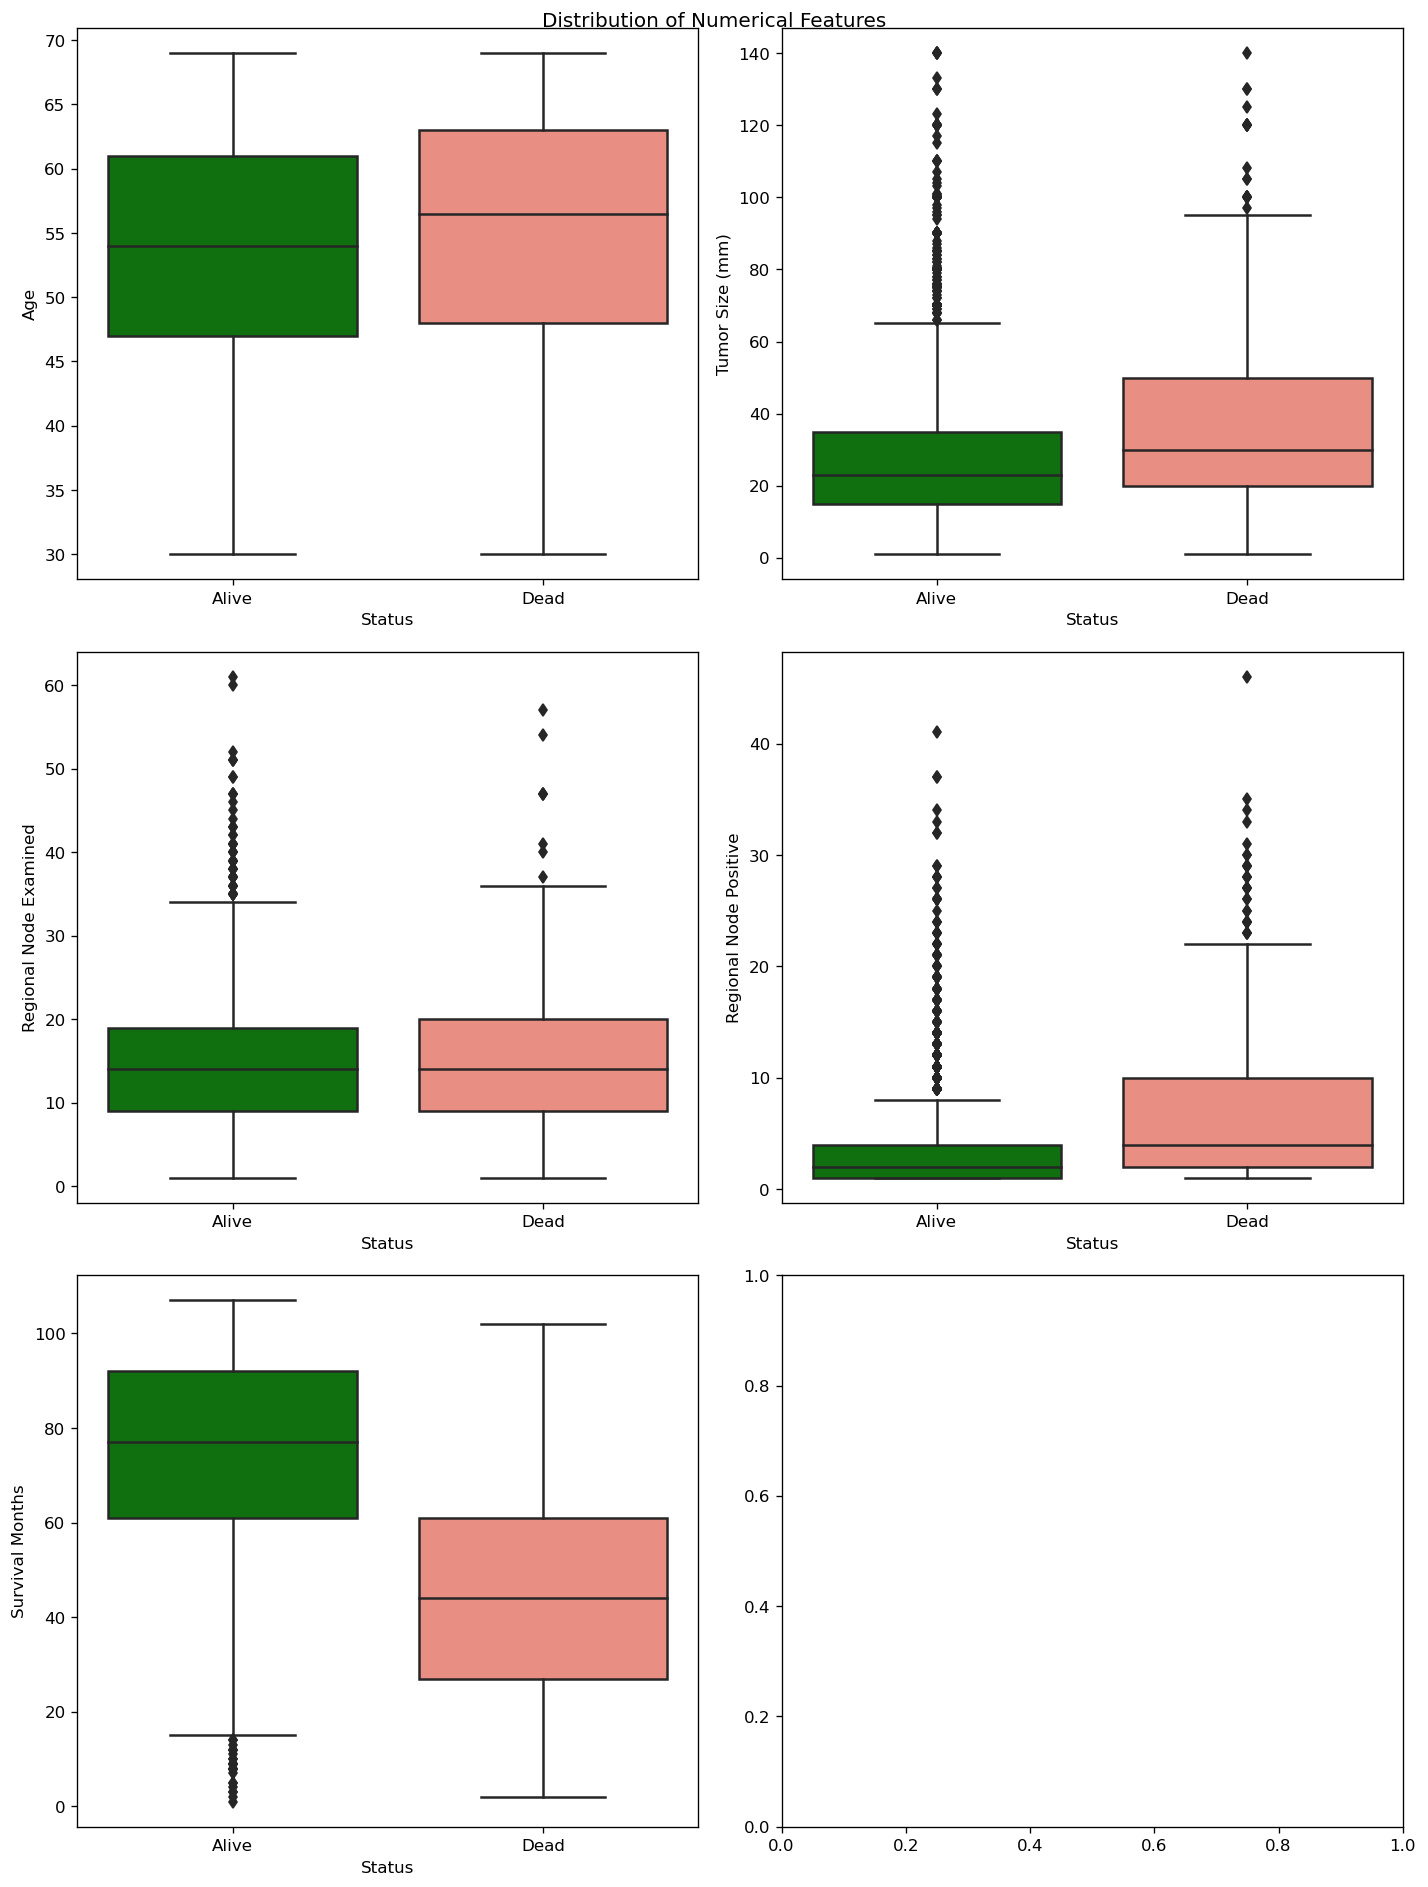

In [22]:
# Boxplot to visualize distribution of numerical features
box_cols = ['Age', 'Tumor Size (mm)', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,16), dpi=120)
fig.suptitle('Distribution of Numerical Features', y = 0.98);
for col, ax in zip(box_cols, axes.ravel()):
    sns.boxplot(data=data, x='Status', y=col, ax=ax, palette=['green','salmon'])
plt.tight_layout()

In [23]:
# Removing outliers
data = data[data['Regional Node Positive'] <= 35]  
data = data[data['Regional Node Examined'] <= 55] 
data = data[data['Tumor Size (mm)'] <= 138]

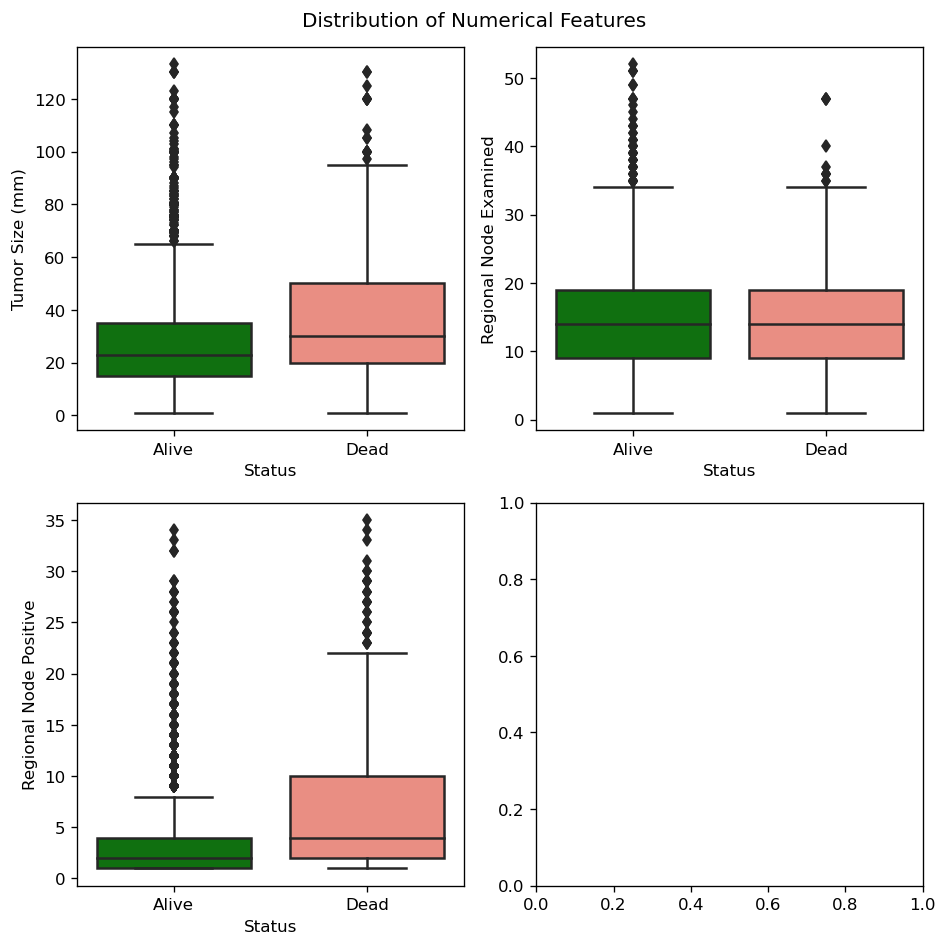

In [24]:
# Boxplot to visualize distribution of numerical features where outliers were removed
box_cols = ['Tumor Size (mm)', 'Regional Node Examined', 'Regional Node Positive']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8), dpi=120)
fig.suptitle('Distribution of Numerical Features', y = 0.98);
for col, ax in zip(box_cols, axes.ravel()):
    sns.boxplot(data=data, x='Status', y=col, ax=ax, palette=['green','salmon'])
plt.tight_layout()

In [25]:
outlier_cols = ['Age', 'Tumor Size (mm)', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']
outlier_index = []
outlier_ind_list=[]

for col in outlier_cols:   
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    upper_bound = data[col].quantile(0.75) + (1.5 * IQR)
    lower_bound = data[col].quantile(0.25) - (1.5 * IQR)
    upper_outliers = data[col] >= upper_bound
    lower_outliers = data[col] <= lower_bound
    outliers = data[upper_outliers | lower_outliers].index
    outlier_index.extend(outliers)
    
# Outlier index with count
outlier_index = Counter(outlier_index)

# Storing only unique outlier index
for key in outlier_index.keys():
    outlier_ind_list.append(key)

# Dropping rows containing outliers
#df = df.drop(outlier_ind_list)

len(outlier_ind_list)

626

The numerical feature boxplot visualizations show that some data points differ significantly from other observations. The "IQR technique" is used to find the outliers in the columns indicated above. There are 626 outliers in all, or almost 16% of all data. As there are only 4024 rows in the dataset, eliminating 15% of the row values could have a big impact on the predictions' outcomes. Therefore, for machine learning modeling, the outliers are not deleted.

### Age vs Survival Month for Breast Cancer

In [26]:
# create a new figure
plt.figure(figsize=(9,6))

# scatter with positive 
plt.scatter(data.Age[data.Status=='Alive'], data['Survival Months'][data.Status=='Alive'],c='green')
# scatter with negative 
plt.scatter(data.Age[data.Status=='Dead'], data['Survival Months'][data.Status=='Dead'], c='salmon')
plt.title('Heart Disease in function of Age and Survial Months')
plt.xlabel('Age')
plt.ylabel('Survival Months')
plt.legend(['Alive','Dead']);

### Regional Node Examined vs Survival Month

In [27]:
# create a new figure
plt.figure(figsize=(9,5))

# scatter with positive 
plt.scatter(data['Survival Months'][data.Status=='Alive'], data['Tumor Size (mm)'][data.Status=='Alive'],c='green')
# scatter with negative 
plt.scatter(data['Survival Months'][data.Status=='Dead'], data['Tumor Size (mm)'][data.Status=='Dead'], c='salmon')
plt.title('Heart Disease in function of Tumor Size(mm) and Survial Months')
plt.xlabel('Regional Node Examined')
plt.ylabel('Survival Months')
plt.legend(['Alive','Dead']);

### Survival month vs Regional Node Positive

In [28]:
# create a new figure
plt.figure(figsize=(9,5))

# scatter with positive 
plt.scatter(data['Survival Months'][data.Status=='Alive'], data['Regional Node Positive'][data.Status=='Alive'],c='green')
# scatter with negative 
plt.scatter(data['Survival Months'][data.Status=='Dead'], data['Regional Node Positive'][data.Status=='Dead'], c='salmon')
plt.title('Heart Disease in function of Regional Node Positive and Survial Months')
plt.xlabel('Regional Node Positive')
plt.ylabel('Survival Months')
plt.legend(['Alive','Dead']);

In [29]:
# counting the values in Grade column
data['Grade'].value_counts()

2                        2343
3                        1107
1                         542
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

In [30]:
#replacing the 'anaplastic; Grade IV' in Grade clumn with 4
data['Grade'].replace([' anaplastic; Grade IV'],['4'],inplace=True)

In [31]:
# counting the values in Grade column to confirm the changes
data['Grade'].value_counts()

2    2343
3    1107
1     542
4      19
Name: Grade, dtype: int64

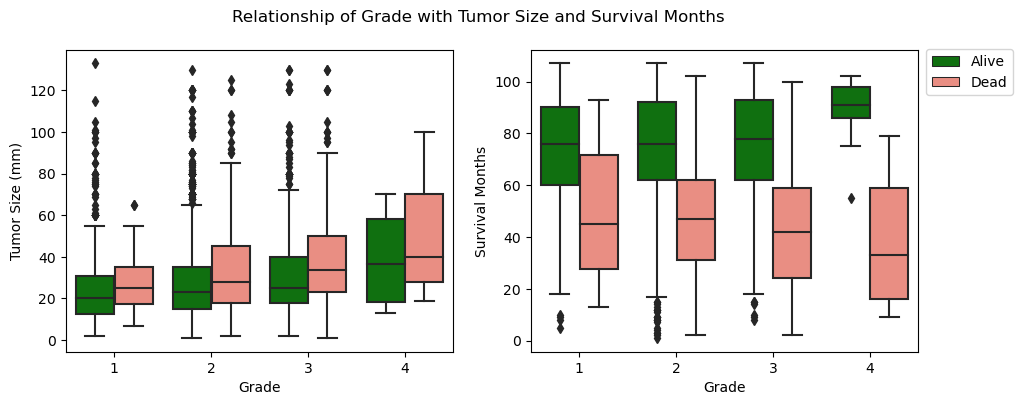

In [32]:
# Relationship of Grade with Tumor Size and Survival Months
grade_cols = ['Tumor Size (mm)', 'Survival Months']
# grade_order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4']
grade_order = ['1','2','3','4']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4), dpi=100)
fig.suptitle('Relationship of Grade with Tumor Size and Survival Months', y = 0.98);
for col, ax in zip(grade_cols, axes.ravel()):
    sns.boxplot(data=data, x='Grade', y=col, hue='Status', order=grade_order, palette=['green','salmon'], ax=ax)
    ax.legend_.remove()
ax.legend(loc=(1.02, 0.85));

In [33]:
# replacing the Alive & Dead values in the Status column with 1 & 0
data["Status"] = pd.to_numeric(data["Status"].replace(['Alive','Dead'], [1,0]))

In [34]:
# create a new figure
fig,ax = plt.subplots(1,2,figsize=(14,5))
fig.suptitle('Dataset Before OverSampling')

# create a scatter plot with hue
sns.scatterplot(x=data['Tumor Size (mm)'], y=data['Regional Node Positive'], hue=data['Status'],
                ax=ax[0]).set(title = 'Tumor Size vs Regional Node Positive by Status')
plt.title('Heart Disease in function of Regional Node Positive and Survial Months');

plt.pie(data['Status'].value_counts())
plt.title('Pie Plot of Status')
plt.legend(['Alive','Dead']);

In [35]:
data['Race'] = data['Race'].replace(['White', 'Black','Other'], [0, 1, 1])
#data['Race'] = data['Race'].replace(['White', '0'], ['Black', '1'], ['Other', '1'])
#data['Marital Status'] = data['Race'].replace(['Married','Divorced','Single','Widowed','Separated'], [2,3,3,3,3])

In [36]:
# Preprocessing the columns with labelEncoder
le = preprocessing.LabelEncoder()

#data['Race']=le.fit_transform(data['Race'])
data['Marital Status']=le.fit_transform(data['Marital Status'])
data['N Stage']=le.fit_transform(data['N Stage'])
data['T Stage']=le.fit_transform(data['T Stage'])
data['6th Stage']=le.fit_transform(data['6th Stage'])
data['Differentiate']=le.fit_transform(data['Differentiate'])
data['Grade']=le.fit_transform(data['Grade'])
data['A Stage']=le.fit_transform(data['A Stage'])
data['Estrogen Status']=le.fit_transform(data['Estrogen Status'])
data['Progesterone Status']=le.fit_transform(data['Progesterone Status'])

In [37]:
# correlaion map for all the variables
plt.figure(figsize=(20,20))

corr =  data.corr()

corr =data.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='BuGn',linewidths=.5, fmt= '.2f', annot_kws={"size": 15})

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.set_title('Correlation Map', size = 20)
plt.show()

In [38]:
# Oversampling the dataset
X = data.drop(['Status','Regional Node Positive','6th Stage'], axis=1)
y = data['Status']
over_sampler = RandomOverSampler(random_state=42)
X, y = over_sampler.fit_resample(X, y)

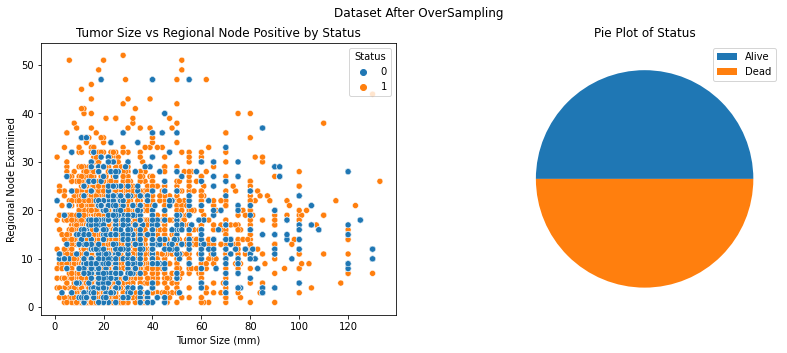

In [39]:
# create a new figure
fig,ax = plt.subplots(1,2,figsize=(14,5))
fig.suptitle('Dataset After OverSampling')
data_smote = pd.merge(X, y, right_index=True, left_index=True)

# create a scatter plot with hue
sns.scatterplot(x=data_smote['Tumor Size (mm)'], y=data_smote['Regional Node Examined'],
                hue=data_smote['Status'], ax=ax[0]).set(title = 'Tumor Size vs Regional Node Positive by Status')
plt.title('Heart Disease in function of Regional Node Positive and Survial Months');
plt.pie(data_smote['Status'].value_counts())
plt.title('Pie Plot of Status')
plt.legend(['Alive','Dead']);

Because of its high efficiency, the `SMOTE` oversampling method is the most used. It combines new instances with already existing ones. Synthetic minority oversampling approach is the name given to it.

In [40]:
# Splitting the dataset
X = data_smote.drop("Status", axis=1)
y = data_smote["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [41]:

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [43]:
from sklearn import svm, metrics
train_predict=model.predict(X_train_scaled)
print("Accuracy on training data: ", metrics.accuracy_score(y_train, train_predict))
print("Precision on training data:", metrics.precision_score(y_train, train_predict))
print("Recall on training data:", metrics.recall_score(y_train, train_predict))

Accuracy on training data:  0.7981972038263428
Precision on training data: 0.7886779184247539
Recall on training data: 0.818912011683096


In [44]:
test_predict=model.predict(X_test_scaled)
print("Accuracy on testing data: ", metrics.accuracy_score(y_test, test_predict))
print("Precision on testing data:", metrics.precision_score(y_test, test_predict))
print("Recall on testing data: ", metrics.recall_score(y_test, test_predict))

Accuracy on testing data:  0.7705882352941177
Precision on testing data: 0.7540263543191801
Recall on testing data:  0.7814871016691958


# Overall Model Performance

In [45]:
cm = metrics.confusion_matrix(y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


TN=533, FP=168, FN=144, TP=515


In [46]:
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
Positive_rate = (TP+FP)/(TP+TN+FP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)
print("Positive_rate = ", Positive_rate)

Calculated accuracy =  0.7705882352941177
Calculated precision =  0.7540263543191801
Calculated recall =  0.7814871016691958
Positive_rate =  0.5022058823529412


In [47]:
PROTECTED  =  "Race" 
WHITE =  0 #male 
OTHER = 1 #women

white_indices = np.where(X_test[PROTECTED] == WHITE)[0]

other_indices = np.where(X_test[PROTECTED] == OTHER)[0]

print(white_indices, "No of White =", white_indices.size)

print(other_indices, "No of Other =", other_indices.size)


[   0    1    2 ... 1357 1358 1359] No of White = 1148
[   5    9   15   17   20   41   44   49   54   62   63   65   66   71
   72   87   95  101  116  131  133  141  149  180  187  189  199  201
  204  209  230  235  243  246  249  250  255  256  260  270  279  288
  291  292  298  303  306  313  314  326  327  341  342  343  355  359
  360  363  380  393  403  415  417  418  429  442  445  454  456  482
  483  496  500  508  520  524  538  539  542  544  546  552  555  560
  580  584  585  600  601  612  613  617  618  626  627  632  641  642
  654  662  663  672  687  693  703  712  716  718  721  731  734  736
  751  752  758  760  768  773  809  815  821  829  832  837  839  854
  857  858  865  874  876  881  892  899  900  904  907  912  913  915
  928  934  935  939  949  952  956  961  967  970  971  973  984  988
 1001 1015 1016 1017 1027 1032 1044 1056 1059 1071 1082 1094 1095 1098
 1105 1107 1112 1113 1120 1124 1147 1150 1151 1153 1154 1167 1169 1173
 1184 1188 1190 1191 1

In [49]:
Y_test_w = [y_test.values[i] for i in white_indices]

Y_test_o = [y_test.values[i] for i in other_indices]


In [50]:
test_predict_w  = [test_predict[i] for i in white_indices]
test_predict_o  = [test_predict[i] for i in other_indices]


# Performance of the Model for White Race

In [51]:
cm_w = metrics.confusion_matrix(Y_test_w, test_predict_w)
TN, FP, FN, TP = cm_w.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_w)
disp.plot()
plt.show()

TN=448, FP=147, FN=117, TP=436


In [52]:
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
Positive_rate = (TP+FP)/(TP+TN+FP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)
print("Positive_rate = ", Positive_rate)

Calculated accuracy =  0.7700348432055749
Calculated precision =  0.7478559176672385
Calculated recall =  0.7884267631103075
Positive_rate =  0.5078397212543554


# Performance of the Model for Other Races

TN=85, FP=21, FN=27, TP=79


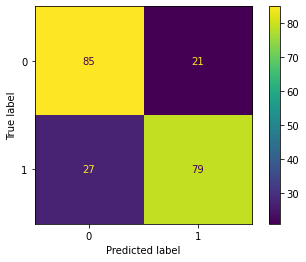

In [53]:
cm_o = metrics.confusion_matrix(Y_test_o, test_predict_o)
TN, FP, FN, TP = cm_o.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_o)
disp.plot()
plt.show()

In [54]:
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
Positive_rate = (TP+FP)/(TP+TN+FP+FN)

print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)
print("Positive_rate = ", Positive_rate)

Calculated accuracy =  0.7735849056603774
Calculated precision =  0.79
Calculated recall =  0.7452830188679245
Positive_rate =  0.4716981132075472
